In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import joblib
import os

<ipython-input-3-0a849deb660b>:28: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo-" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(K_range, wcss, 'bo-', marker='o')


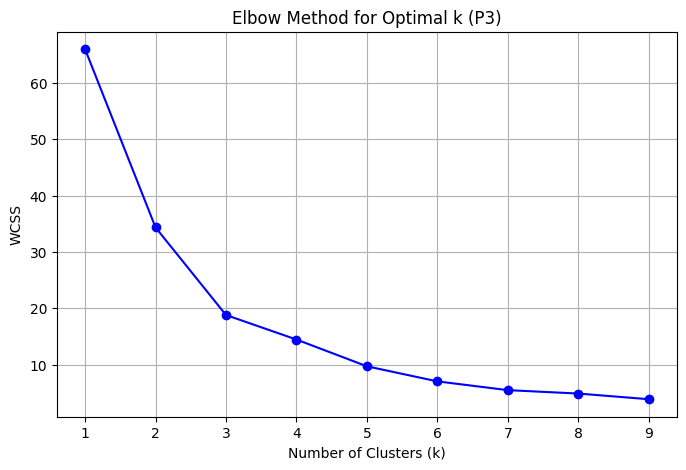

In [3]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/erp_features.csv')

# Select P3 features
features = df[['Latency_P3 (ms)', 'Amplitude_P3 (µV)']].copy()

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save folder
save_path = '/content/drive/MyDrive/k-means_clustering_P3'
os.makedirs(save_path, exist_ok=True)

# Save scaler
joblib.dump(scaler, f'{save_path}/scaler_P3.pkl')

# Elbow method to find optimal k
wcss = []
K_range = range(1, 10)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot and save elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'bo-', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k (P3)')
plt.grid(True)
plt.savefig(f'{save_path}/elbow_plot_P3.png')
plt.show()

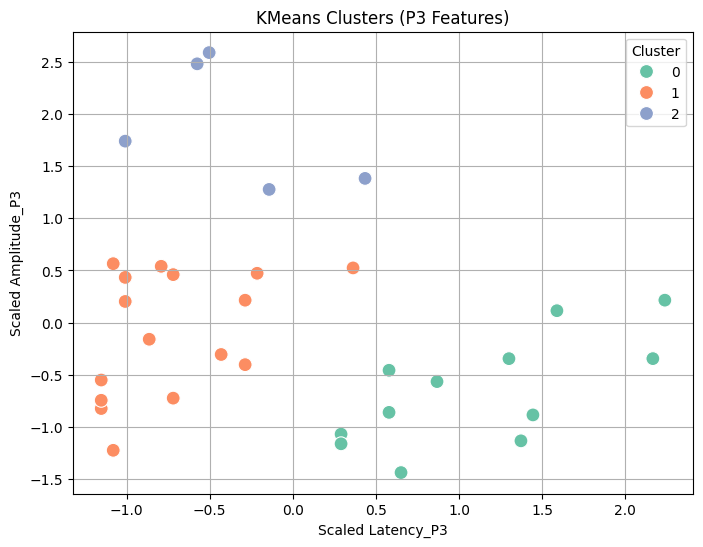

In [4]:
# Choose optimal k (e.g., from elbow plot)
k = 3

kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels
df['Cluster_P3'] = clusters

# Save clustered dataset
df.to_csv(f'{save_path}/clustered_P3.csv', index=False)

# Save model
joblib.dump(kmeans, f'{save_path}/kmeans_model_P3.pkl')

# Evaluation metrics
sil_score = silhouette_score(scaled_features, clusters)
dbi_score = davies_bouldin_score(scaled_features, clusters)

with open(f'{save_path}/evaluation_P3.txt', 'w') as f:
    f.write(f'Silhouette Score: {sil_score:.4f}\n')
    f.write(f'Davies-Bouldin Index: {dbi_score:.4f}\n')

# Visualization with
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_features[:, 0],  # Latency_P3
    y=scaled_features[:, 1],  # Amplitude_P3
    hue=clusters,
    palette='Set2',
    s=100
)
plt.title('KMeans Clusters (P3 Features)')
plt.xlabel('Scaled Latency_P3')
plt.ylabel('Scaled Amplitude_P3')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{save_path}/cluster_plot_P3.png')
plt.show()

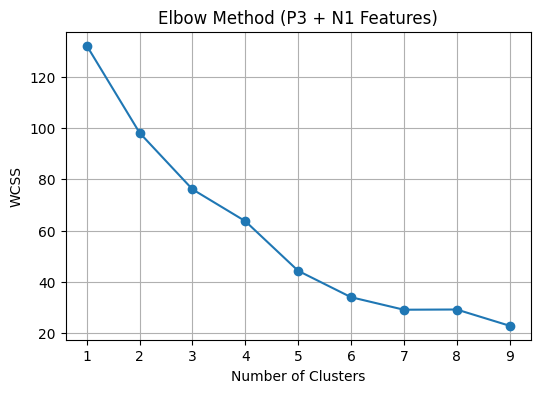

In [5]:
# Load your ERP dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/erp_features.csv')

# Create save directory
save_path = '/content/drive/MyDrive/k-means_clustering_P3_N1'
os.makedirs(save_path, exist_ok=True)

# Extract P3 and N1 features
features = df[['Latency_P3 (ms)', 'Amplitude_P3 (µV)', 'Latency_N1 (ms)', 'Amplitude_N1 (µV)']].copy()

# Standardize
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save scaler
import joblib
joblib.dump(scaler, f'{save_path}/scaler_P3_N1.pkl')

# Optional: Elbow method to help pick optimal k
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method (P3 + N1 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig(f'{save_path}/elbow_plot_P3_N1.png')
plt.show()

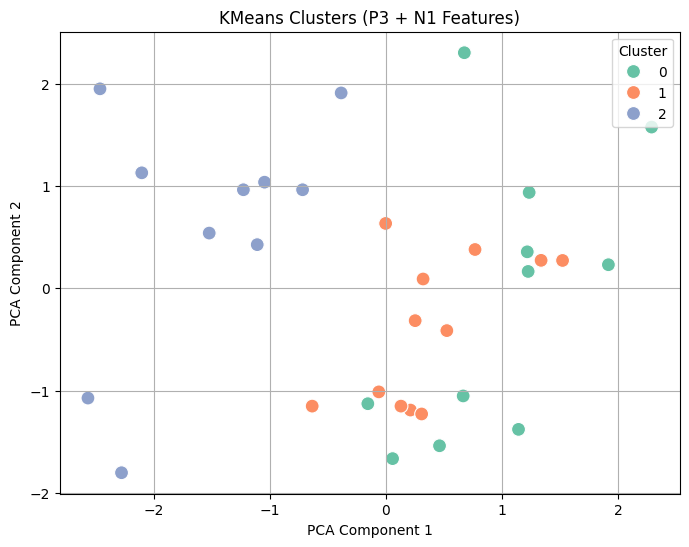

In [6]:
# Set k (use elbow plot to decide)
k = 3

# KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels
df['Cluster_P3_N1'] = clusters

# Save clustered dataset
df.to_csv(f'{save_path}/clustered_P3_N1.csv', index=False)

# Save model
joblib.dump(kmeans, f'{save_path}/kmeans_model_P3_N1.pkl')

# Save evaluation metrics
sil_score = silhouette_score(scaled_features, clusters)
dbi_score = davies_bouldin_score(scaled_features, clusters)

with open(f'{save_path}/evaluation_P3_N1.txt', 'w') as f:
    f.write(f'Silhouette Score: {sil_score:.4f}\n')
    f.write(f'Davies-Bouldin Index: {dbi_score:.4f}\n')

# PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components[:, 0], y=components[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('KMeans Clusters (P3 + N1 Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{save_path}/cluster_plot_P3_N1.png')
plt.show()

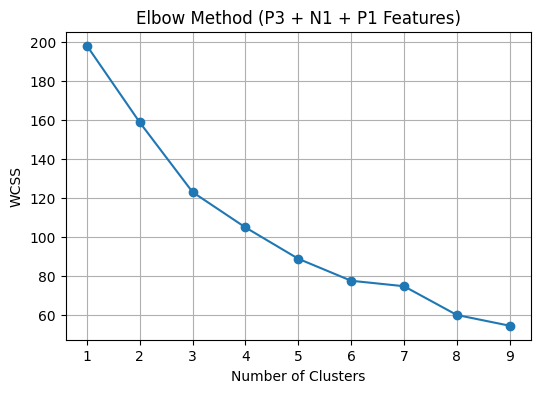

In [7]:
# Load your ERP dataset
df = pd.read_csv('/content/drive/MyDrive/dataset/erp_features.csv')

# Create save directory for P1
save_path = '/content/drive/MyDrive/k-means_clustering_P3_N1_P1'
os.makedirs(save_path, exist_ok=True)

features = df[['Latency_P3 (ms)', 'Amplitude_P3 (µV)', 'Latency_N1 (ms)', 'Amplitude_N1 (µV)', 'Latency_P1 (ms)', 'Amplitude_P1 (µV)']].copy()

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Save scaler
import joblib
joblib.dump(scaler, f'{save_path}/scaler_P3_N1_P1.pkl')

# Optional: Elbow method to help pick optimal k
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method to determine the optimal k
plt.figure(figsize=(6, 4))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method (P3 + N1 + P1 Features)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.savefig(f'{save_path}/elbow_plot_P3_N1_P1.png')
plt.show()

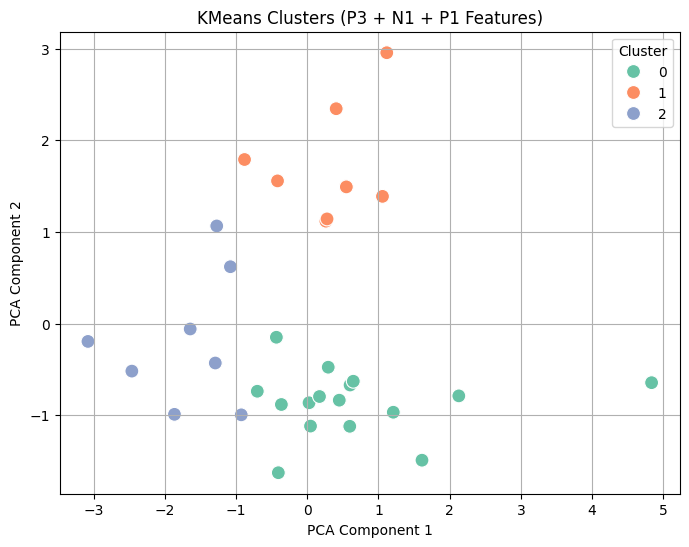

In [8]:
k = 3

# KMeans clustering
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
clusters = kmeans.fit_predict(scaled_features)

# Add cluster labels to the dataframe
df['Cluster_P3_N1_P1'] = clusters

# Save the clustered dataset
df.to_csv(f'{save_path}/clustered_P3_N1_P1.csv', index=False)

# Save the trained model
joblib.dump(kmeans, f'{save_path}/kmeans_model_P3_N1_P1.pkl')

# Save evaluation metrics
sil_score_p1 = silhouette_score(scaled_features, clusters)
dbi_score_p1 = davies_bouldin_score(scaled_features, clusters)

with open(f'{save_path}/evaluation_P3_N1_P1.txt', 'w') as f:
    f.write(f'Silhouette Score: {sil_score_p1:.4f}\n')
    f.write(f'Davies-Bouldin Index: {dbi_score_p1:.4f}\n')

# PCA for 2D visualization
pca_p1 = PCA(n_components=2)
components_p1 = pca_p1.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=components_p1[:, 0], y=components_p1[:, 1], hue=clusters, palette='Set2', s=100)
plt.title('KMeans Clusters (P3 + N1 + P1 Features)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig(f'{save_path}/cluster_plot_P3_N1_P1.png')
plt.show()